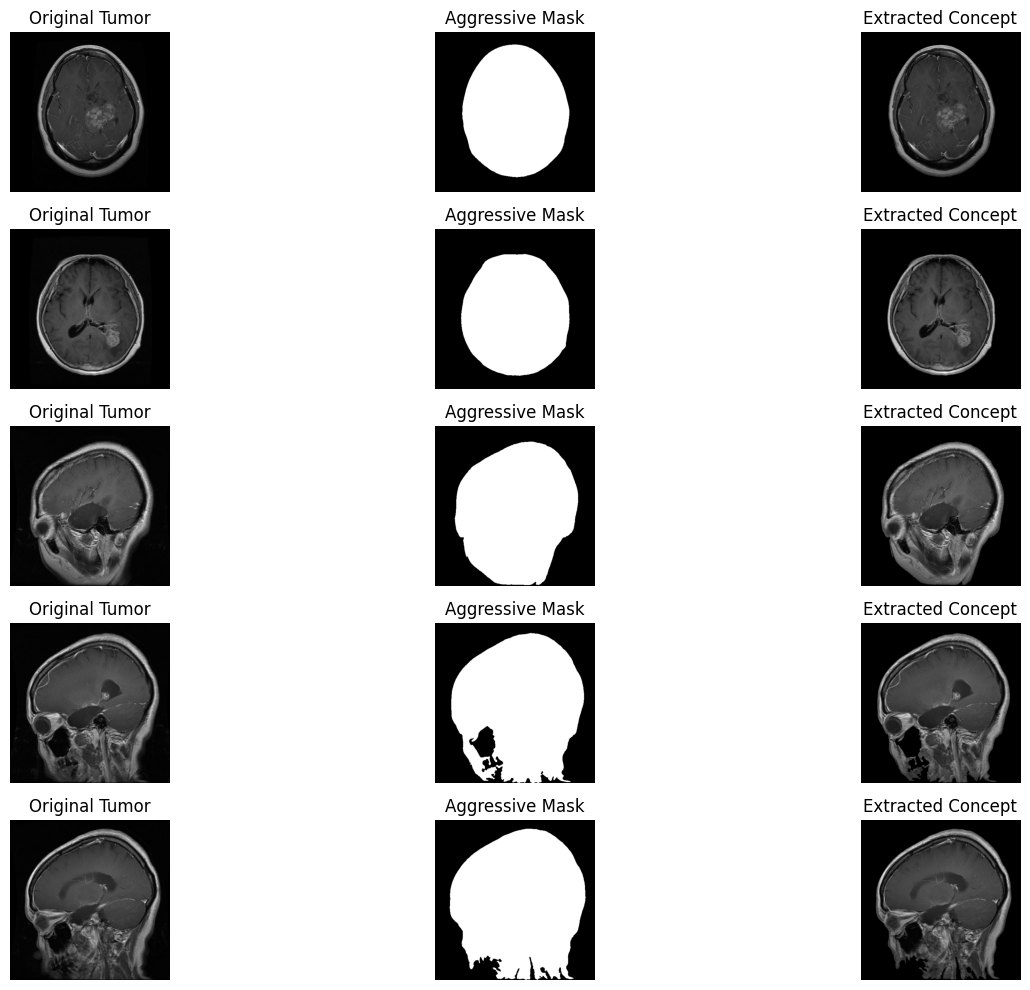

In [2]:
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

# Update this path
RAW_DATA_DIR = "../content/dataset" 

def aggressive_lesion_extraction(image):
    """
    The 'Original' Aggressive Logic.
    No dilation, strict thresholding. Tries to find the 'brightest blob'.
    """
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # 1. Blur heavily to group bright pixels
    blurred = cv2.GaussianBlur(gray, (7, 7), 0)
    
    # 2. Aggressive Thresholding (Otsu)
    # This separates the 'brightest' stuff from everything else
    _, thresh = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    
    # 3. Find Contours
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    if not contours:
        return image, thresh

    # 4. Find the Largest Bright Blob
    c = max(contours, key=cv2.contourArea)
    
    # Masking
    mask = np.zeros_like(gray)
    cv2.drawContours(mask, [c], -1, 255, -1)
    
    masked_img = cv2.bitwise_and(image, image, mask=mask)
    
    return masked_img, mask

def test_aggressive_on_tumors():
    tumor_dir = os.path.join(RAW_DATA_DIR, "Tumor")
    files = [f for f in os.listdir(tumor_dir) if f.lower().endswith(('.jpg', '.png'))][:5] # Test first 5
    
    plt.figure(figsize=(15, 10))
    
    for i, fname in enumerate(files):
        img_path = os.path.join(tumor_dir, fname)
        img = cv2.imread(img_path)
        
        # Run Aggressive Extraction
        result, mask = aggressive_lesion_extraction(img)
        
        # Plot
        plt.subplot(5, 3, i*3 + 1)
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.title("Original Tumor")
        plt.axis('off')
        
        plt.subplot(5, 3, i*3 + 2)
        plt.imshow(mask, cmap='gray')
        plt.title("Aggressive Mask")
        plt.axis('off')
        
        plt.subplot(5, 3, i*3 + 3)
        plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
        plt.title("Extracted Concept")
        plt.axis('off')
        
    plt.tight_layout()
    plt.show()

test_aggressive_on_tumors()